In [868]:
import pandas as pd
import numpy as np

annual_rain_data = pd.read_csv("Annual_Rain_Data.csv")

#annual_rain_data.head()

In [869]:
#Check empty Data
#annual_rain_data.apply(lambda x:sum(x.isnull()), axis=0)

In [870]:
annual_rain_data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
#T && F is 1 && 0
annual_rain_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [871]:
#Rain Data
x = annual_rain_data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [872]:
#Flood Data
y = annual_rain_data.iloc[:,15]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

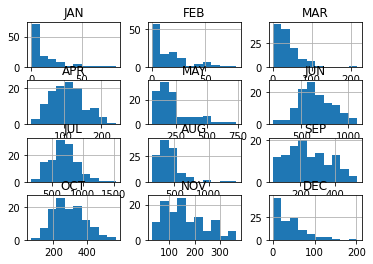

In [873]:
#Data_Visualization

import matplotlib.pyplot as plt

beta_1 = annual_rain_data[['JAN','FEB','MAR',
                            'APR','MAY','JUN',
                            'JUL','AUG','SEP',
                            'OCT','NOV','DEC']]
beta_1.hist()
plt.show()

In [874]:
import sklearn as sk
from sklearn import preprocessing

minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

#minmax.fit(x).transform(x)

In [875]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
22,1923,24.7,0.7,78.9,43.5,80.0,722.5,1008.7,943.0,254.3,203.1,83.9,41.6
99,2000,11.7,57.8,21.5,96.3,124.5,633.8,343.2,566.5,195.8,214.2,78.1,69.1
8,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3
100,2001,16.5,28.3,7.0,238.0,238.6,715.3,598.5,361.3,216.8,319.6,181.0,10.1
97,1998,6.0,2.1,8.1,61.1,151.6,732.5,641.4,371.8,517.6,444.8,135.0,79.4


In [876]:
y_train.head()

22     1
99     0
8      1
100    0
97     1
Name: FLOODS, dtype: int64

In [877]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [878]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr_clf = lr.fit(x_train_std, y_train,10)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [879]:
lr_accuracy.mean()

0.6999999999999998

In [880]:
y_predict = lr_clf.predict(x_test_std)
print("Predict chances of flood")
print(y_predict)

Predict chances of flood
[1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0]


In [881]:
print("Actual chances of flood")
print(y_test.values)

Actual chances of flood
[1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0]


In [882]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

print("\n Accuracy Score: %f" %(accuracy_score(y_test, y_predict)*100))
print("\n Recall Score: %f" %(recall_score(y_test, y_predict)*100))
print("\n Roc Score: %f" %(roc_auc_score(y_test, y_predict)*100))


 Accuracy Score: 93.333333

 Recall Score: 94.444444

 Roc Score: 93.055556
